# 📊 Exploratory Data Analysis (EDA) - Merged Dataset
## Student Dropout Prediction Project

This notebook analyzes the combined dataset of **13,000+ students** to identify patterns, correlations, and key predictors of student dropout.

In [17]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import importlib
import warnings
warnings.filterwarnings('ignore')

# Add parent directory to path
sys.path.append('..')
import config
importlib.reload(config)  # Force reload to get latest paths

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


## 1. Load Merged Dataset

In [18]:
try:
    df = pd.read_csv(config.MERGED_DATASET_PATH)
    print(f"✓ Dataset loaded successfully: {df.shape[0]:,} rows, {df.shape[1]} columns")
    display(df.head())
except FileNotFoundError:
    print("❌ Error: Merged dataset not found. Please run 00_merge_datasets_v2.ipynb first.")
except AttributeError:
    print("❌ Error: Config path not found. Please restart the kernel.")

✓ Dataset loaded successfully: 9,013 rows, 17 columns


,Dataset_Source,Age,Gender,Marital_Status,Course,Mother_Qualification,Father_Qualification,Previous_Qualification,Displaced,Debtor,Tuition_Fees_Up_To_Date,Scholarship_Holder,Unemployment_Rate,Inflation_Rate,GDP,Target,Admission_Grade
0,Higher Education Predictors,20,1,1.0,2.0,13,10,1.0,1,0.0,1,0.0,10.8,1.4,1.74,Dropout,NaN
1,Higher Education Predictors,19,1,1.0,11.0,1,3,1.0,1,0.0,0,0.0,13.9,-0.3,0.79,Graduate,NaN
2,Higher Education Predictors,19,1,1.0,5.0,22,27,1.0,1,0.0,0,0.0,10.8,1.4,1.74,Dropout,NaN
3,Higher Education Predictors,20,0,1.0,15.0,23,27,1.0,1,0.0,1,0.0,9.4,-0.8,-3.12,Graduate,NaN
4,Higher Education Predictors,45,0,2.0,3.0,22,28,1.0,0,0.0,1,0.0,13.9,-0.3,0.79,Graduate,NaN


## 2. Target Variable Analysis

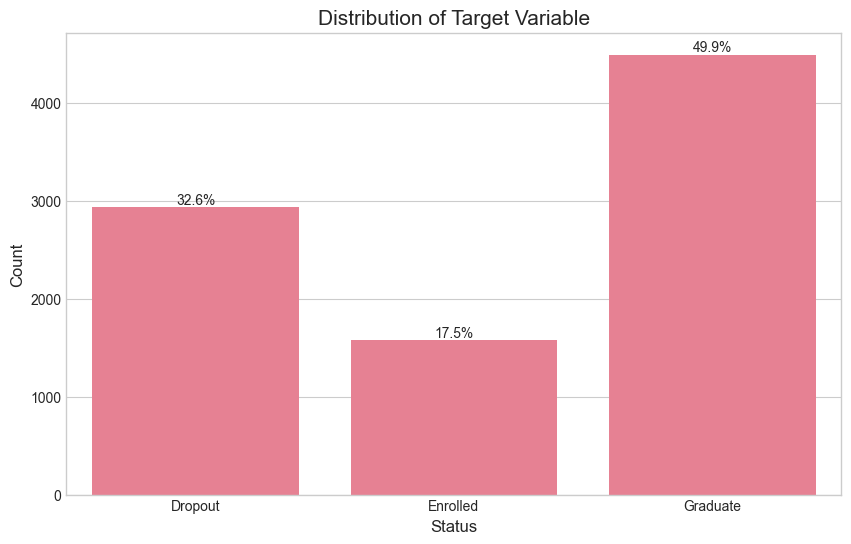

Target
Graduate    49.850216
Dropout     32.608454
Enrolled    17.541329
Name: proportion, dtype: float64


In [19]:
if 'Target' in df.columns:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x='Target', data=df, order=['Dropout', 'Enrolled', 'Graduate'])
    plt.title('Distribution of Target Variable', fontsize=15)
    plt.xlabel('Status', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
    # Add percentages
    total = len(df)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')
    
    plt.show()
    
    print(df['Target'].value_counts(normalize=True) * 100)

## 3. Missing Value Analysis

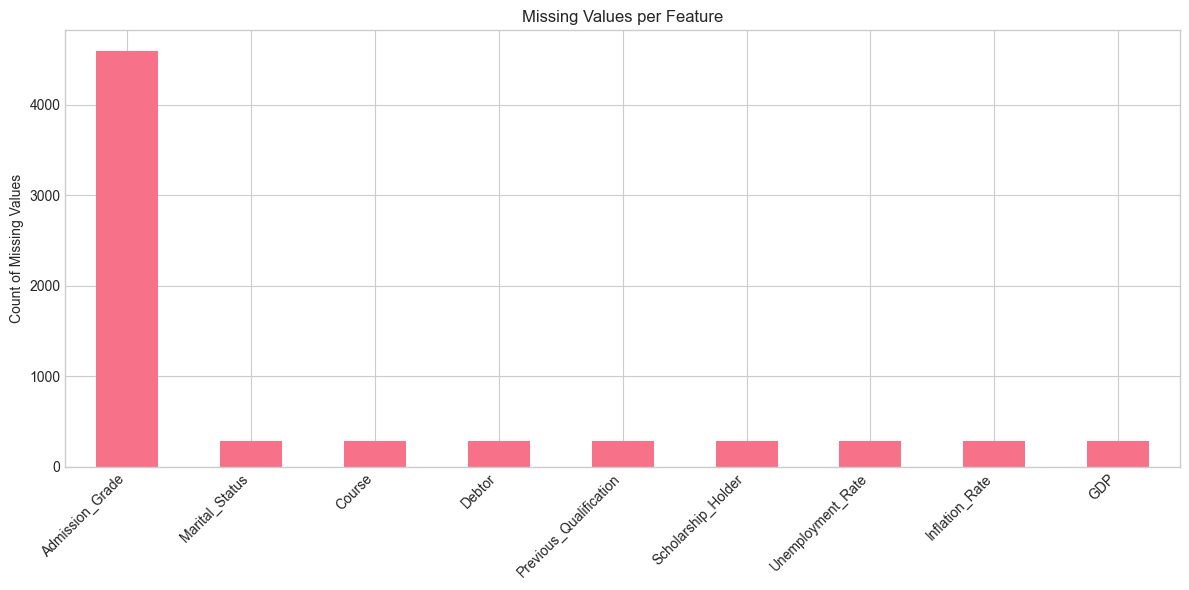

Top Missing Features (%):
Admission_Grade           50.926440
Marital_Status             3.139909
Course                     3.139909
Debtor                     3.139909
Previous_Qualification     3.139909
Scholarship_Holder         3.139909
Unemployment_Rate          3.139909
Inflation_Rate             3.139909
GDP                        3.139909
dtype: float64


In [20]:
plt.figure(figsize=(12, 6))
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(ascending=False).plot(kind='bar')
plt.title('Missing Values per Feature')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Top Missing Features (%):")
print((missing / len(df) * 100).sort_values(ascending=False).head(10))

## 4. Numerical Feature Analysis

Numerical Features (13): ['Age', 'Gender', 'Marital_Status', 'Course', 'Mother_Qualification', 'Father_Qualification', 'Previous_Qualification', 'Debtor', 'Scholarship_Holder', 'Unemployment_Rate', 'Inflation_Rate', 'GDP', 'Admission_Grade']


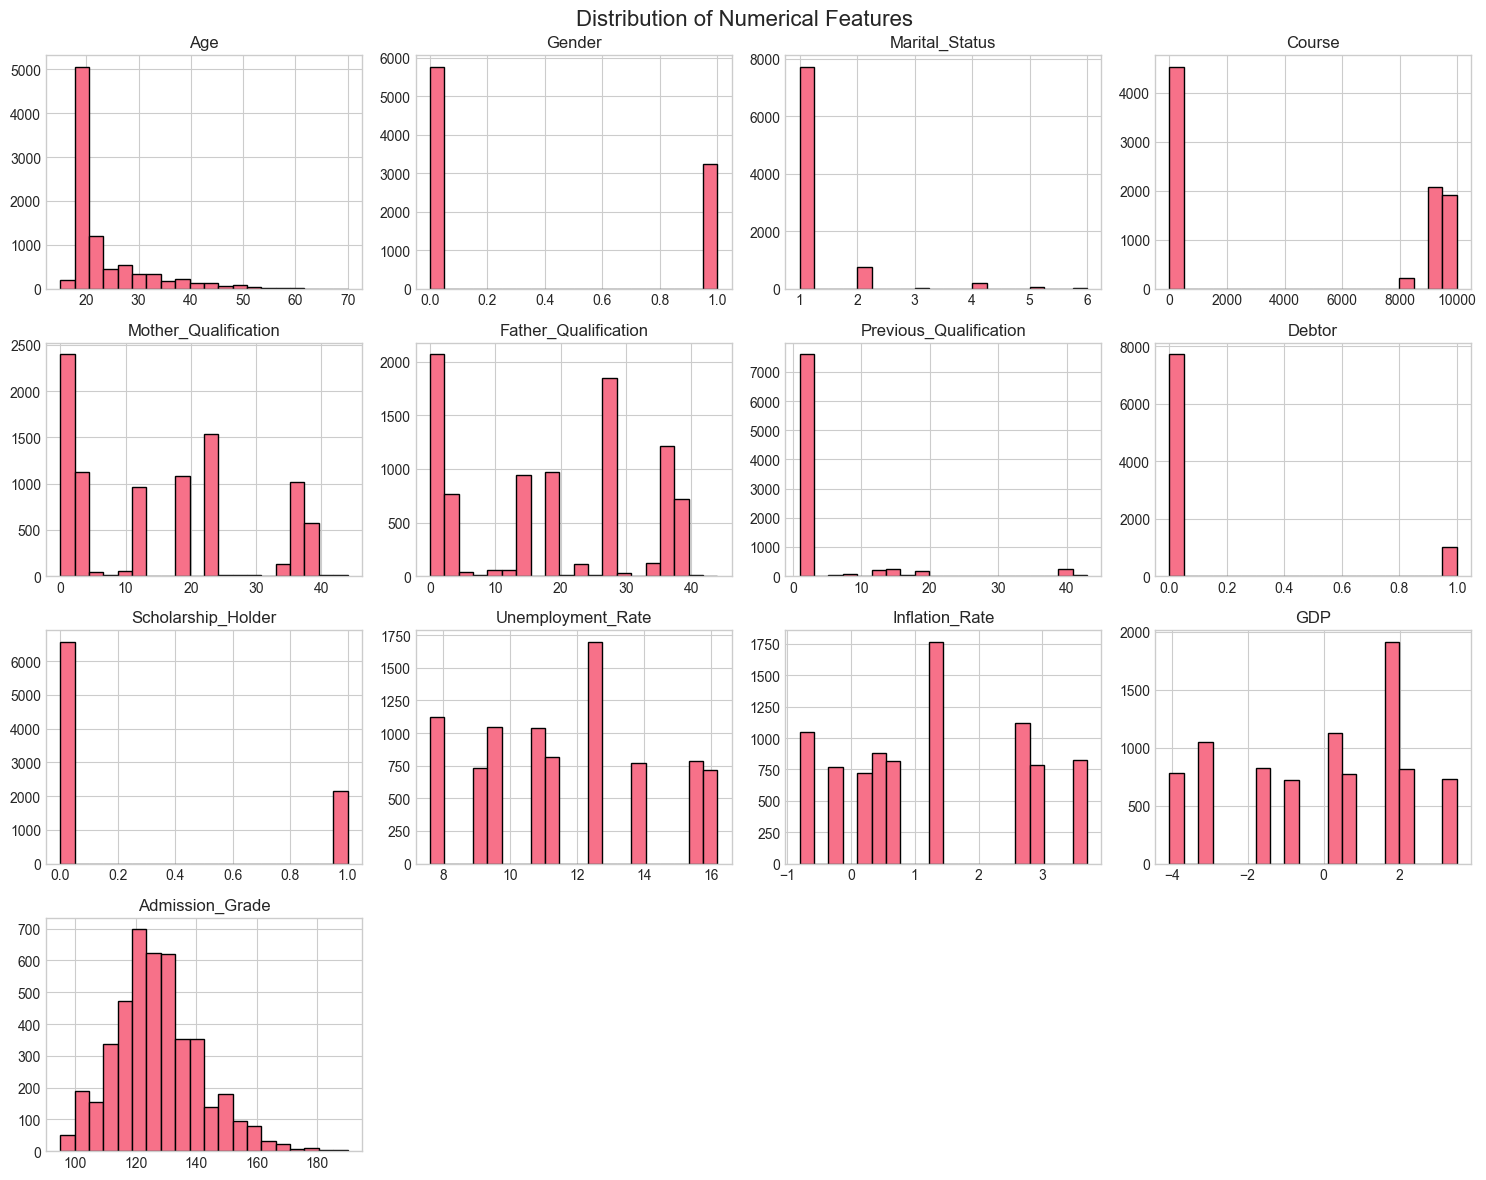

In [21]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = [c for c in numerical_cols if c != 'Target']  # Exclude target if encoded

print(f"Numerical Features ({len(numerical_cols)}): {list(numerical_cols)}")

# Plot histograms
df[numerical_cols].hist(figsize=(15, 12), bins=20, edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

## 5. Categorical Feature Analysis

Categorical Features (2): ['Displaced', 'Tuition_Fees_Up_To_Date']


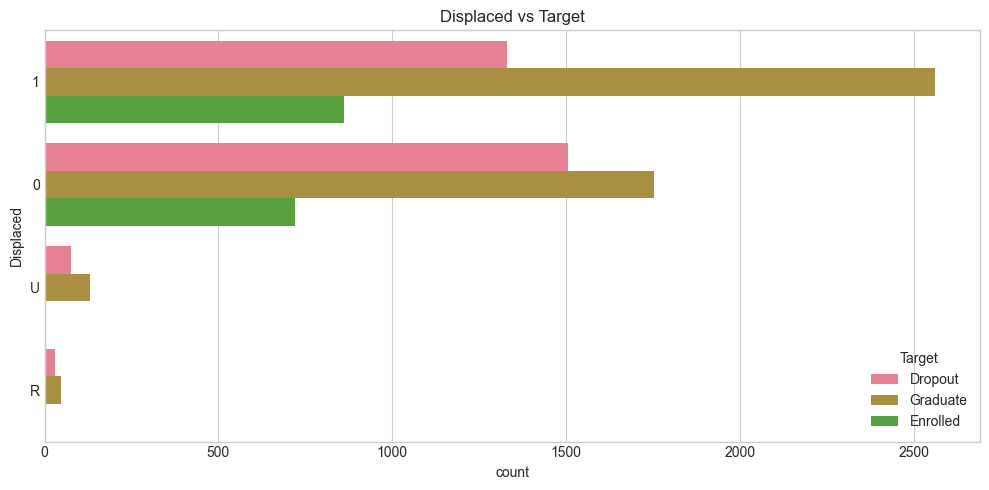

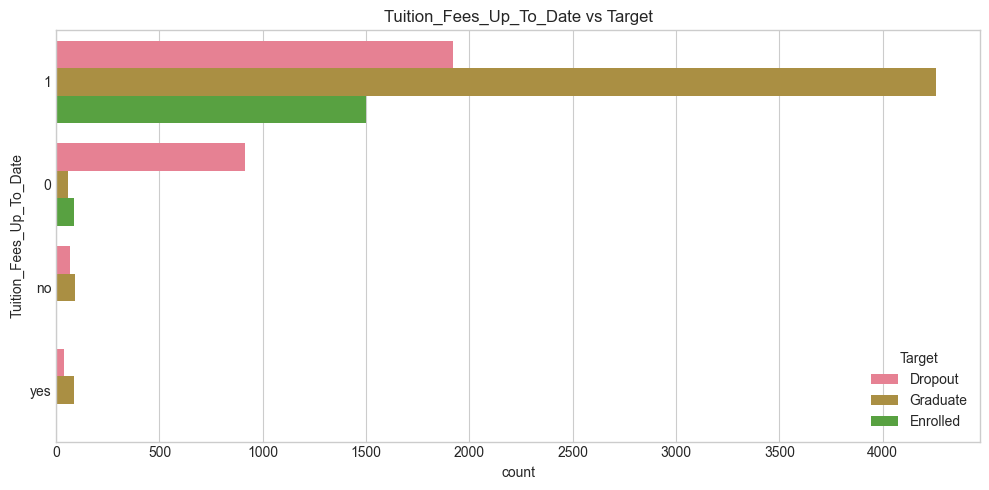

In [22]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols = [c for c in categorical_cols if c != 'Target' and c != 'Dataset_Source']

print(f"Categorical Features ({len(categorical_cols)}): {list(categorical_cols)}")

for col in categorical_cols:
    if df[col].nunique() < 10:  # Only plot if few categories
        plt.figure(figsize=(10, 5))
        sns.countplot(y=col, hue='Target', data=df)
        plt.title(f'{col} vs Target')
        plt.tight_layout()
        plt.show()

## 6. Correlation Analysis

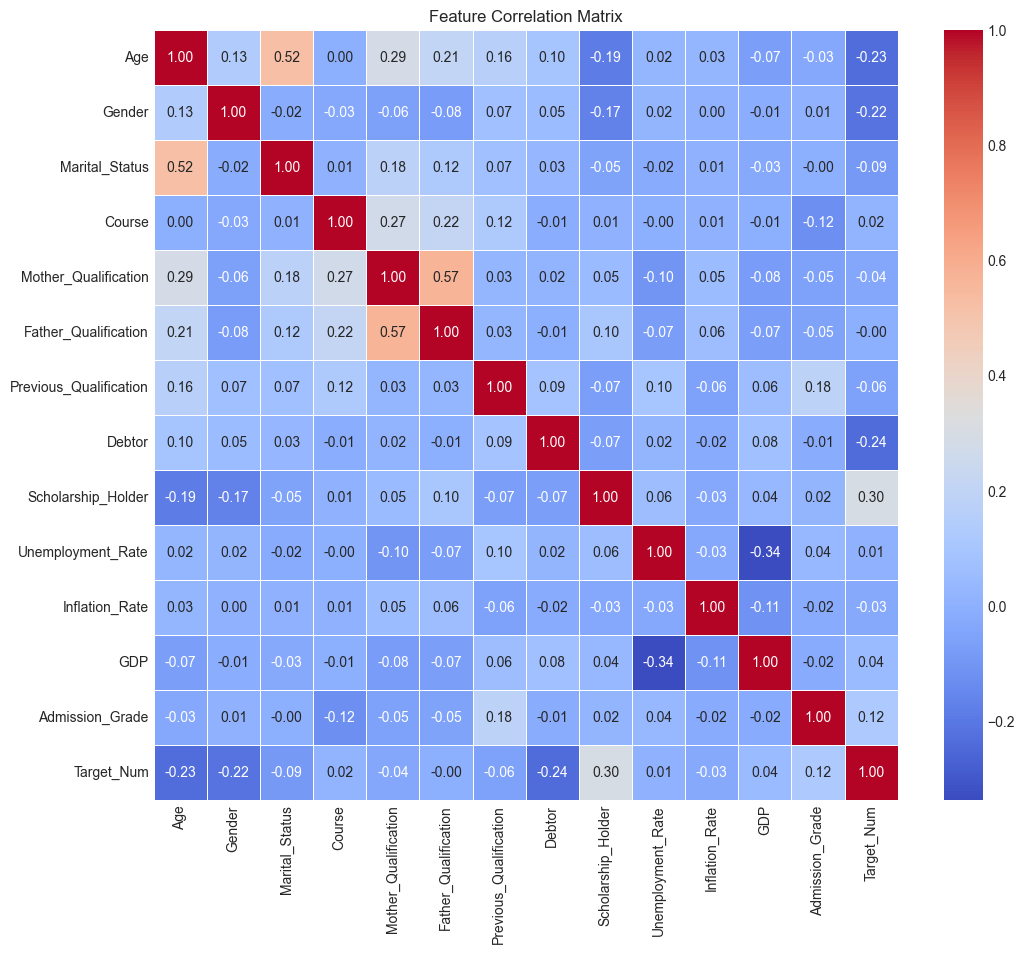

Top Correlations with Target:
Target_Num                1.000000
Scholarship_Holder        0.295557
Admission_Grade           0.121338
GDP                       0.044938
Course                    0.016378
Unemployment_Rate         0.008680
Father_Qualification     -0.003023
Inflation_Rate           -0.027026
Mother_Qualification     -0.037364
Previous_Qualification   -0.057286
Marital_Status           -0.087369
Gender                   -0.215851
Age                      -0.234891
Debtor                   -0.239294
Name: Target_Num, dtype: float64


In [23]:
# Encode Target for correlation
df_corr = df.copy()
target_map = {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}
df_corr['Target_Num'] = df_corr['Target'].map(target_map)

# Calculate correlation
corr = df_corr.select_dtypes(include=['number']).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

# Top correlations with Target
print("Top Correlations with Target:")
print(corr['Target_Num'].sort_values(ascending=False))